In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA")
print("="*70)

# ============================================================
# STEP 1: Load UMAP-Reduced Data
# ============================================================
print("\n[Step 1] Loading UMAP-reduced data...")

df_umap = pd.read_csv('Data/umap_dataset.csv')
print(f"✓ Loaded UMAP data: {df_umap.shape}")
print(f"  Samples: {df_umap.shape[0]}")
print(f"  Features (UMAP Components): {df_umap.shape[1]}")

C2C PROJECT - KMEANS CLUSTERING ON UMAP DATA

[Step 1] Loading UMAP-reduced data...
✓ Loaded UMAP data: (10492, 20)
  Samples: 10492
  Features (UMAP Components): 20


In [68]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 11)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_umap)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_umap, labels)
    davies_bouldin = davies_bouldin_score(df_umap, labels)
    calinski = calinski_harabasz_score(df_umap, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 44,799.36
  Silhouette Score: 0.8138 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.2059 (lower is better)
  Calinski-Harabasz Score: 60,408.69 (higher is better)

k=3:
  Inertia: 26,591.14
  Silhouette Score: 0.5520 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.5527 (lower is better)
  Calinski-Harabasz Score: 54,473.01 (higher is better)

k=4:
  Inertia: 17,095.04
  Silhouette Score: 0.5052 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7304 (lower is better)
  Calinski-Harabasz Score: 58,424.78 (higher is better)

k=5:
  Inertia: 12,844.61
  Silhouette Score: 0.5211 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 0.7150 (lower is better)
  Calinski-Harabasz Score: 59,180.62 (higher is better)

k=6:
  Inertia: 11,325.87
  Silhouette Score: 0.5280 (high

[Step 3] Visualizing clustering evaluation metrics...
✓ Saved: umap_clustering_evaluation.png


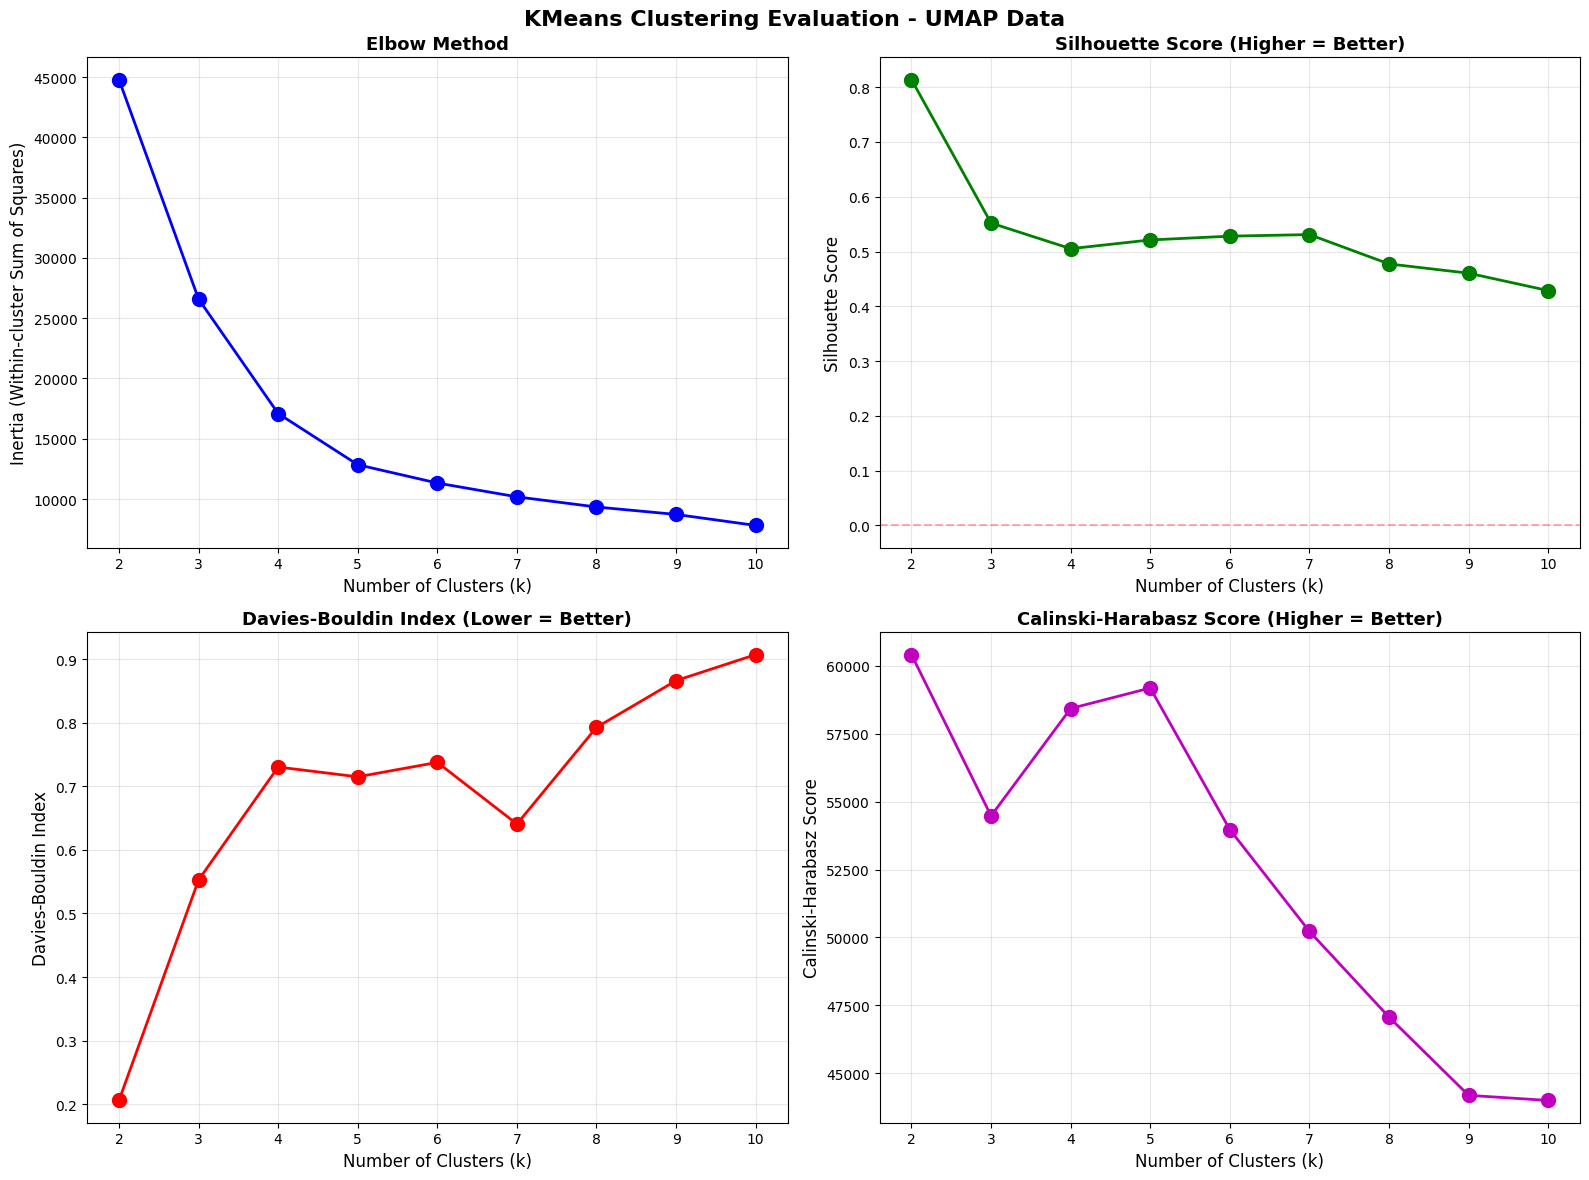

In [69]:
# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - UMAP Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
print("✓ Saved: umap_clustering_evaluation.png")
plt.show()

In [70]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")

print("\n" + "="*70)
print("PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k")
print("="*70)


[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 2
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 2
Approximate elbow point: 7

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [71]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 5

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_umap)

# Add cluster labels to dataframe
df_umap['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_umap.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_umap.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")


[Step 5] Applying KMeans with k=5...
----------------------------------------------------------------------
✓ Clustering complete with k=5

Final Clustering Metrics:
  Silhouette Score: 0.5211
  Davies-Bouldin Index: 0.7150
  Calinski-Harabasz Score: 59,180.62


In [72]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_umap['Cluster'].value_counts().sort_index()
cluster_percentages = (df_umap['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 10:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio > 5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")


[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 2,996 patients (28.56%)
  Cluster 1: 1,722 patients (16.41%)
  Cluster 2: 1,784 patients (17.00%)
  Cluster 3: 1,207 patients (11.50%)
  Cluster 4: 2,783 patients (26.52%)

Cluster Balance:
  Largest cluster: 2,996 patients
  Smallest cluster: 1,207 patients
  Imbalance ratio: 2.48x
  ✓ Clusters are reasonably balanced



[Step 7] Visualizing clusters...
✓ Saved: umap_clusters_2d.png


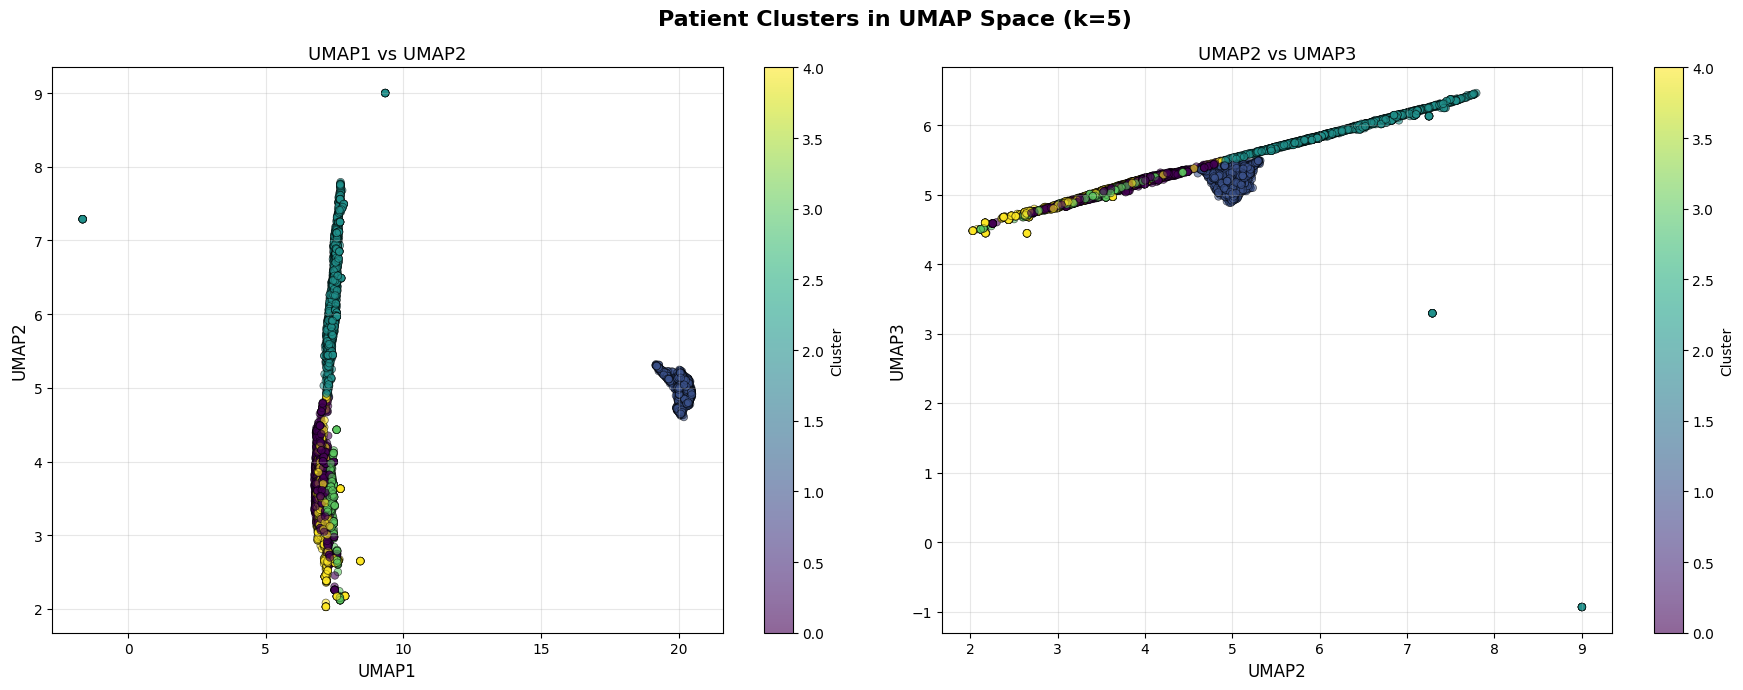

✓ Saved: umap_clusters_3d.png


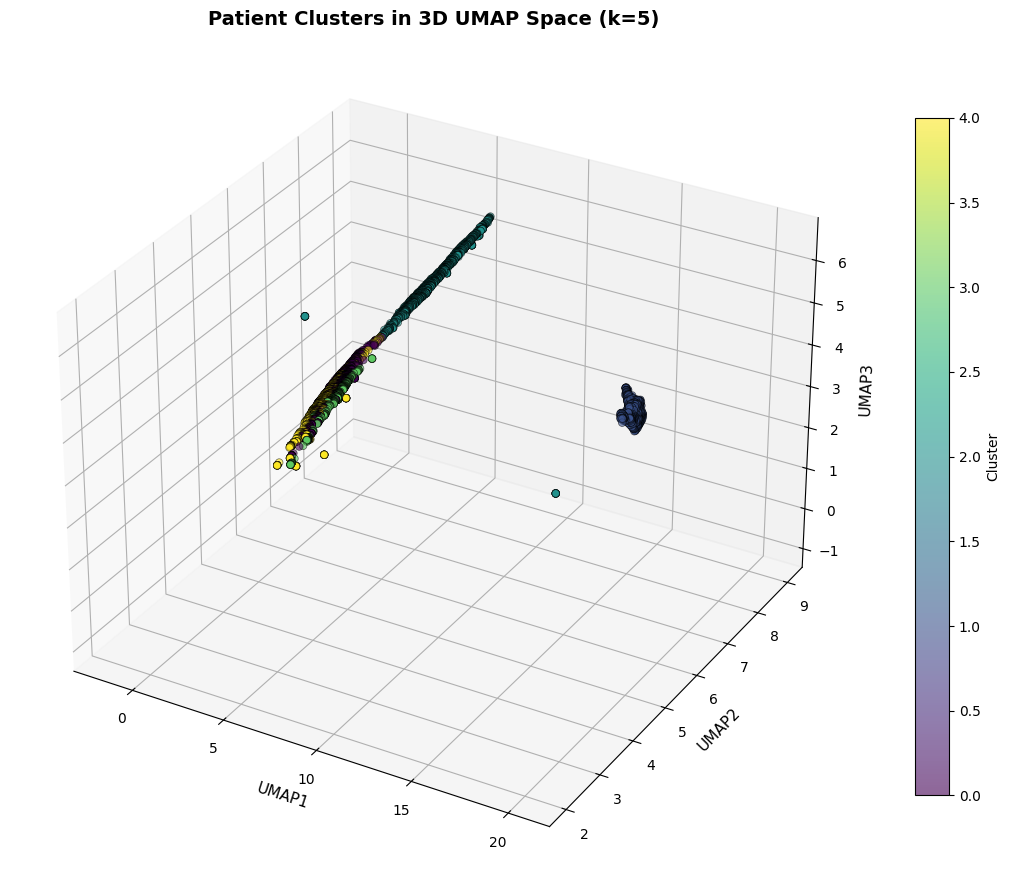

✓ Saved: umap_cluster_distribution.png


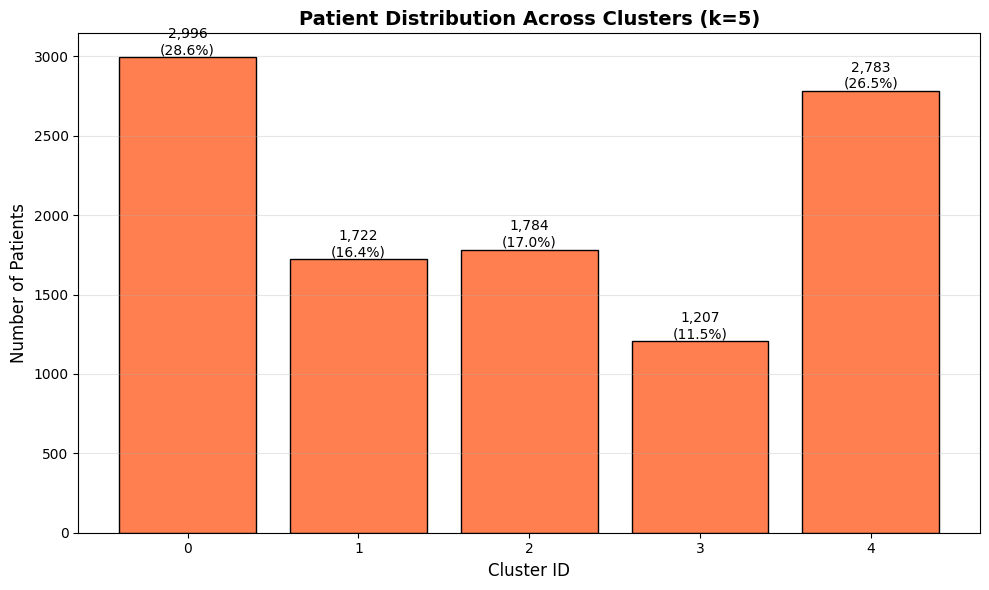

In [73]:
# ============================================================
# STEP 7: Visualize Clusters
# ============================================================
print("\n[Step 7] Visualizing clusters...")

# 2D visualization (UMAP1 vs UMAP2)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(f'Patient Clusters in UMAP Space (k={optimal_k})', 
            fontsize=16, fontweight='bold')

# Plot 1: UMAP1 vs UMAP2
scatter1 = axes[0].scatter(
    df_umap['UMAP1'], 
    df_umap['UMAP2'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[0].set_xlabel('UMAP1', fontsize=12)
axes[0].set_ylabel('UMAP2', fontsize=12)
axes[0].set_title('UMAP1 vs UMAP2', fontsize=13)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: UMAP2 vs UMAP3
scatter2 = axes[1].scatter(
    df_umap['UMAP2'], 
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)
axes[1].set_xlabel('UMAP2', fontsize=12)
axes[1].set_ylabel('UMAP3', fontsize=12)
axes[1].set_title('UMAP2 vs UMAP3', fontsize=13)
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
print("✓ Saved: umap_clusters_2d.png")
plt.show()

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap['UMAP1'],
    df_umap['UMAP2'],
    df_umap['UMAP3'],
    c=df_umap['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Patient Clusters in 3D UMAP Space (k={optimal_k})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_clusters_3d.png")
plt.show()

# Cluster size bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k), cluster_counts, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Patient Distribution Across Clusters (k={optimal_k})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({cluster_percentages[i]:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("✓ Saved: umap_cluster_distribution.png")
plt.show()

### Now lets see if we can break down the other cluster 0 into smaller ones - Because it is reasonalbly bigenough

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)")
print("="*70)

# ============================================================
# CURRENT STATE
# ============================================================
print("\nCurrent cluster distribution:")
print(df_umap['Cluster'].value_counts().sort_index())

# ============================================================
# STEP 1: Extract Clusters 0 and 3
# ============================================================
print("\n" + "="*70)
print("EXTRACTING CLUSTERS 0 AND 3 FOR SUB-CLUSTERING")
print("="*70)

cluster_0_data = df_umap[df_umap['Cluster'] == 0].copy()
cluster_3_data = df_umap[df_umap['Cluster'] == 4].copy()

print(f"\nCluster 0: {len(cluster_0_data):,} patients")
print(f"Cluster 3: {len(cluster_3_data):,} patients")

SUB-CLUSTERING LARGE UMAP CLUSTERS (0 & 3 ONLY)

Current cluster distribution:
Cluster
0    2996
1    1722
2    1784
3    1207
4    2783
Name: count, dtype: int64

EXTRACTING CLUSTERS 0 AND 3 FOR SUB-CLUSTERING

Cluster 0: 2,996 patients
Cluster 3: 2,783 patients


In [101]:
# ============================================================
# STEP 2: Analyze Cluster 0
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 0 SUB-CLUSTERING")
print("="*70)

cluster_0_features = cluster_0_data.drop(columns=['Cluster'])
sub_cluster_range = range(2, 5)
metrics_c0 = {'k': [], 'silhouette': [], 'davies_bouldin': []}

print("\nEvaluating sub-cluster options for Cluster 0:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_0_features)
    
    sil = silhouette_score(cluster_0_features, labels)
    db = davies_bouldin_score(cluster_0_features, labels)
    
    metrics_c0['k'].append(k)
    metrics_c0['silhouette'].append(sil)
    metrics_c0['davies_bouldin'].append(db)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f}")
    print(f"  Davies-Bouldin: {db:.4f}")
    print()

best_k_c0 = metrics_c0['k'][np.argmax(metrics_c0['silhouette'])]
print(f"Recommended for Cluster 0: {best_k_c0} sub-clusters")


ANALYZING CLUSTER 0 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 0:

k=2:
  Silhouette: 0.3707
  Davies-Bouldin: 1.0513

k=3:
  Silhouette: 0.2739
  Davies-Bouldin: 1.3480

k=4:
  Silhouette: 0.2994
  Davies-Bouldin: 1.1717

Recommended for Cluster 0: 2 sub-clusters


In [102]:
# ============================================================
# STEP 3: Analyze Cluster 3
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 3 SUB-CLUSTERING")
print("="*70)

cluster_3_features = cluster_3_data.drop(columns=['Cluster'])
metrics_c3 = {'k': [], 'silhouette': [], 'davies_bouldin': []}

print("\nEvaluating sub-cluster options for Cluster 3:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_3_features)
    
    sil = silhouette_score(cluster_3_features, labels)
    db = davies_bouldin_score(cluster_3_features, labels)
    
    metrics_c3['k'].append(k)
    metrics_c3['silhouette'].append(sil)
    metrics_c3['davies_bouldin'].append(db)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f}")
    print(f"  Davies-Bouldin: {db:.4f}")
    print()

best_k_c3 = metrics_c3['k'][np.argmax(metrics_c3['silhouette'])]
print(f"Recommended for Cluster 3: {best_k_c3} sub-clusters")


ANALYZING CLUSTER 3 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 3:

k=2:
  Silhouette: 0.3723
  Davies-Bouldin: 1.1820

k=3:
  Silhouette: 0.2687
  Davies-Bouldin: 1.3536

k=4:
  Silhouette: 0.2609
  Davies-Bouldin: 1.2300

Recommended for Cluster 3: 2 sub-clusters



✓ Saved: umap_sub_clustering_evaluation.png


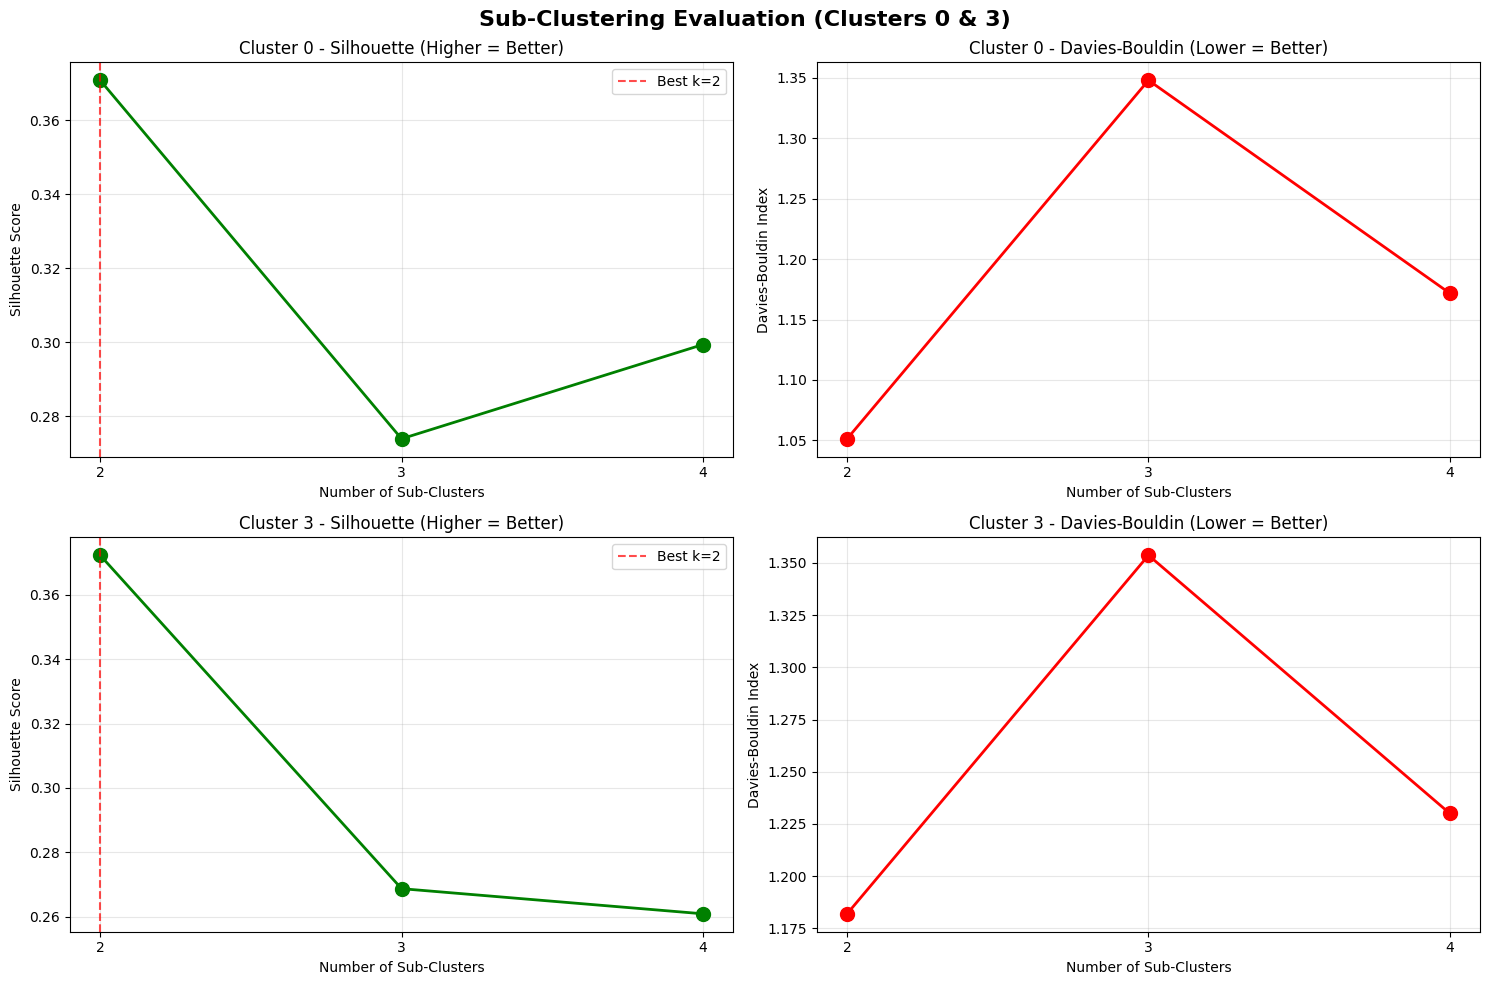

In [103]:
# ============================================================
# STEP 4: Visualize Evaluation
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sub-Clustering Evaluation (Clusters 0 & 3)', fontsize=16, fontweight='bold')

# Cluster 0
axes[0, 0].plot(metrics_c0['k'], metrics_c0['silhouette'], 'go-', linewidth=2, markersize=10)
axes[0, 0].axvline(x=best_k_c0, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c0}')
axes[0, 0].set_xlabel('Number of Sub-Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Cluster 0 - Silhouette (Higher = Better)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics_c0['k'])
axes[0, 0].legend()

axes[0, 1].plot(metrics_c0['k'], metrics_c0['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Sub-Clusters')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Cluster 0 - Davies-Bouldin (Lower = Better)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics_c0['k'])

# Cluster 3
axes[1, 0].plot(metrics_c3['k'], metrics_c3['silhouette'], 'go-', linewidth=2, markersize=10)
axes[1, 0].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[1, 0].set_xlabel('Number of Sub-Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Cluster 3 - Silhouette (Higher = Better)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics_c3['k'])
axes[1, 0].legend()

axes[1, 1].plot(metrics_c3['k'], metrics_c3['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Sub-Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Cluster 3 - Davies-Bouldin (Lower = Better)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics_c3['k'])

plt.tight_layout()
print("\n✓ Saved: umap_sub_clustering_evaluation.png")
plt.show()

In [ ]:
# ============================================================
# STEP 5: User Input
# ============================================================
print("\n" + "="*70)
print("CHOOSE SUB-CLUSTER SIZES")
print("="*70)

k_split_c0 = 2
k_split_c3 = 2

# ============================================================
# STEP 6: Apply Sub-Clustering
# ============================================================
print("\n" + "="*70)
print("APPLYING SUB-CLUSTERING")
print("="*70)

print(f"\nSub-clustering Cluster 0 into {k_split_c0} groups...")
kmeans_c0 = KMeans(n_clusters=k_split_c0, random_state=42, n_init=50)
sub_labels_c0 = kmeans_c0.fit_predict(cluster_0_features)

print(f"Sub-clustering Cluster 4 into {k_split_c3} groups...")
kmeans_c3 = KMeans(n_clusters=k_split_c3, random_state=42, n_init=50)
sub_labels_c3 = kmeans_c3.fit_predict(cluster_3_features)


CHOOSE SUB-CLUSTER SIZES

APPLYING SUB-CLUSTERING

Sub-clustering Cluster 0 into 2 groups...
Sub-clustering Cluster 3 into 2 groups...


In [105]:
# ============================================================
# STEP 7: Create Refined Labels
# ============================================================
print("\n" + "="*70)
print("CREATING REFINED CLUSTER STRUCTURE")
print("="*70)

df_umap_refined = df_umap.copy()
df_umap_refined['Cluster_Original'] = df_umap_refined['Cluster'].copy()
df_umap_refined['Cluster_Refined'] = df_umap_refined['Cluster'].copy()

# New cluster mapping:
# Cluster 0 → splits into 0, 1, 2, ... (k_split_c0 clusters)
# Cluster 1 → stays as next ID
# Cluster 2 → stays as next ID
# Cluster 3 → splits into next IDs
# Cluster 4 → stays as next ID

new_cluster_id = 0

# Cluster 0 sub-clusters
for idx, sub_label in zip(cluster_0_data.index, sub_labels_c0):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c0

# Cluster 1 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 1, 'Cluster_Refined'] = new_cluster_id
new_cluster_id += 1

# Cluster 2 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 2, 'Cluster_Refined'] = new_cluster_id
new_cluster_id += 1

# Cluster 3 stays as-is
df_umap_refined.loc[df_umap_refined['Cluster_Original'] == 3, 'Cluster_Refined'] = new_cluster_id

# Cluster 4 sub-clusters
for idx, sub_label in zip(cluster_3_data.index, sub_labels_c3):
    df_umap_refined.loc[idx, 'Cluster_Refined'] = new_cluster_id + sub_label

new_cluster_id += k_split_c3

# Update main cluster column
df_umap_refined['Cluster'] = df_umap_refined['Cluster_Refined']

print("\nOriginal clustering:")
print(df_umap['Cluster'].value_counts().sort_index())

print("\nRefined clustering:")
print(df_umap_refined['Cluster'].value_counts().sort_index())

total_clusters = len(df_umap_refined['Cluster'].unique())
print(f"\nTotal clusters: {total_clusters}")


CREATING REFINED CLUSTER STRUCTURE

Original clustering:
Cluster
0    2996
1    1722
2    1784
3    1207
4    2783
Name: count, dtype: int64

Refined clustering:
Cluster
0    2671
1     325
2    1722
3    1784
4    3608
5     382
Name: count, dtype: int64

Total clusters: 6



VISUALIZING REFINED CLUSTERS
✓ Saved: umap_refined_clusters_3d.png


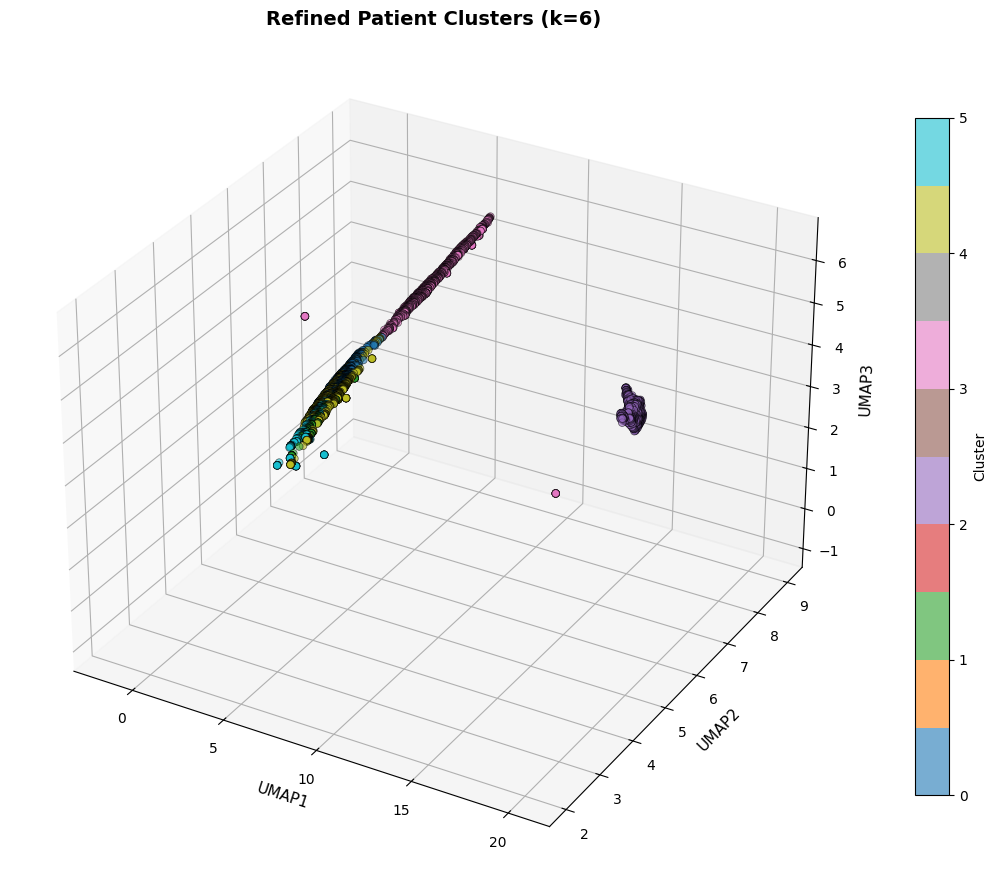

✓ Saved: umap_refined_distribution.png


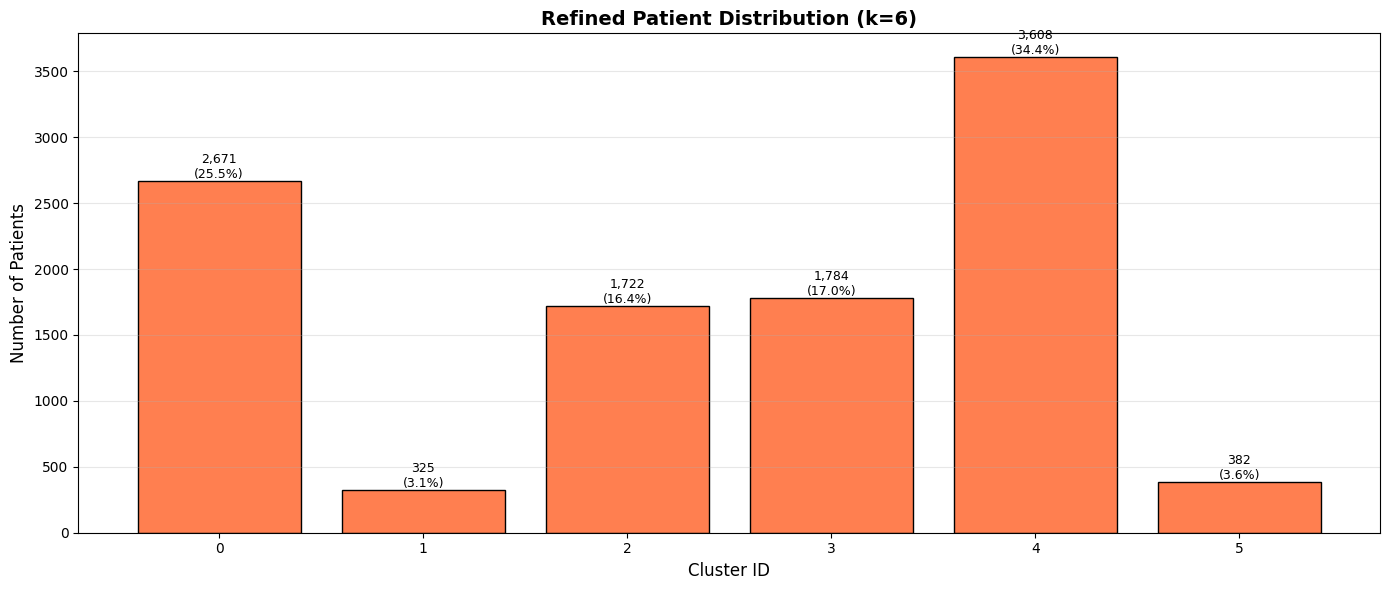

In [106]:
# ============================================================
# STEP 8: Visualize
# ============================================================
print("\n" + "="*70)
print("VISUALIZING REFINED CLUSTERS")
print("="*70)

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_umap_refined['UMAP1'],
    df_umap_refined['UMAP2'],
    df_umap_refined['UMAP3'],
    c=df_umap_refined['Cluster'],
    cmap='tab10',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('UMAP1', fontsize=11)
ax.set_ylabel('UMAP2', fontsize=11)
ax.set_zlabel('UMAP3', fontsize=11)
ax.set_title(f'Refined Patient Clusters (k={total_clusters})', fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: umap_refined_clusters_3d.png")
plt.show()

# Distribution plot
cluster_counts_refined = df_umap_refined['Cluster'].value_counts().sort_index()
cluster_percentages_refined = (df_umap_refined['Cluster'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(range(total_clusters), cluster_counts_refined, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Refined Patient Distribution (k={total_clusters})', fontsize=14, fontweight='bold')
plt.xticks(range(total_clusters))
plt.grid(True, alpha=0.3, axis='y')

for i, cluster_id in enumerate(cluster_counts_refined.index):
    height = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    plt.text(i, height, f'{int(height):,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("✓ Saved: umap_refined_distribution.png")
plt.show()

In [107]:
# ============================================================
# STEP 9: Calculate Metrics
# ============================================================
print("\n" + "="*70)
print("FINAL METRICS")
print("="*70)

cluster_features = df_umap_refined.drop(columns=['Cluster', 'Cluster_Original', 'Cluster_Refined'])
final_silhouette = silhouette_score(cluster_features, df_umap_refined['Cluster'])
final_db = davies_bouldin_score(cluster_features, df_umap_refined['Cluster'])
final_ch = calinski_harabasz_score(cluster_features, df_umap_refined['Cluster'])

print(f"\nSilhouette Score: {final_silhouette:.4f}")
print(f"Davies-Bouldin Index: {final_db:.4f}")
print(f"Calinski-Harabasz Score: {final_ch:,.2f}")

print(f"\nCluster Summary:")
for cluster_id in sorted(df_umap_refined['Cluster'].unique()):
    count = len(df_umap_refined[df_umap_refined['Cluster'] == cluster_id])
    pct = (count / len(df_umap_refined)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


FINAL METRICS

Silhouette Score: 0.3343
Davies-Bouldin Index: 1.4595
Calinski-Harabasz Score: 26,515.90

Cluster Summary:
  Cluster 0: 2,671 patients (25.5%)
  Cluster 1: 325 patients (3.1%)
  Cluster 2: 1,722 patients (16.4%)
  Cluster 3: 1,784 patients (17.0%)
  Cluster 4: 3,608 patients (34.4%)
  Cluster 5: 382 patients (3.6%)


### Add the clusters to the original dataset and perform EDA on them!

In [108]:
import pandas as pd

print("="*70)
print("APPENDING CLUSTER LABELS TO ORIGINAL DATASET")
print("="*70)

# ============================================================
# STEP 1: Load Original Dataset
# ============================================================
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/sampled_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


APPENDING CLUSTER LABELS TO ORIGINAL DATASET

[Step 1] Loading original dataset...
✓ Original dataset loaded: (10492, 47)


In [109]:
# ============================================================
# STEP 2: Extract Cluster Labels from Existing DataFrames
# ============================================================
print("\n[Step 2] Extracting cluster labels from dataframes...")

# You already have df_pca_refined and df_umap_refined in memory
# Extract the cluster columns
umap_clusters = df_umap_refined['Cluster'].values

print(f"✓ PCA clusters extracted: {len(umap_clusters)} labels")
print(f"  Unique PCA clusters: {sorted(df_umap_refined['Cluster'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ PCA clusters extracted: 10492 labels
  Unique PCA clusters: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)]


In [110]:
df_umap.shape

(10492, 21)

### UMAP gives all unbalanced clusters - So lets proceed with PCA only for now!